In [2]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [6]:
X, y= make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42
)

<Axes: >

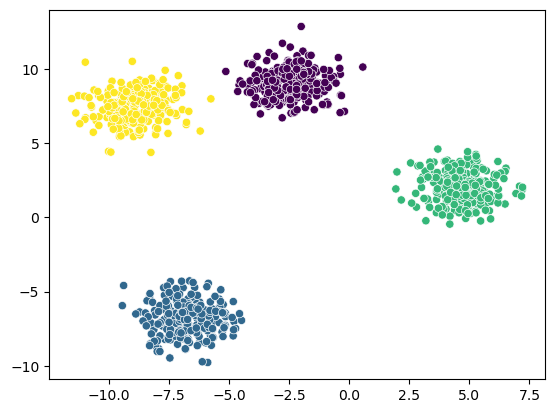

In [20]:
#visualize
sns.scatterplot(x=X[:,0],y=X[:,1],c=labels)

In [21]:
# k means clustering
from sklearn.cluster import KMeans

In [22]:
K=4
kmeans = KMeans(
    n_clusters=K,
    random_state=42
)

In [23]:
labels = kmeans.fit_predict(X)

In [24]:
labels

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 3, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 3, 2, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 3, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

# Choose our K value - elbow, sihouette score

In [26]:
# Elbow Method

wcss = []
for k in range (1,21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

<Axes: >

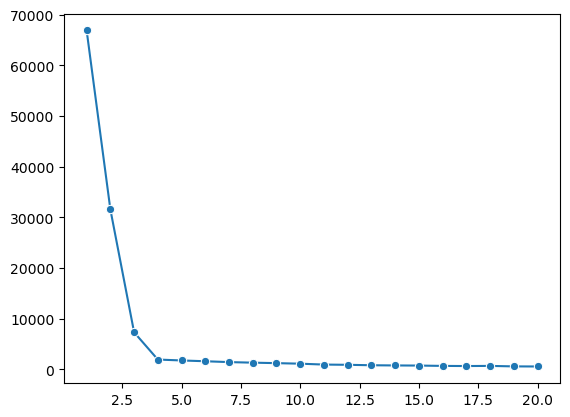

In [29]:
sns.lineplot(x=range(1,21), y=wcss,marker='o')

In [31]:
# knee Module
!pip install kneed

In [33]:
from kneed import KneeLocator

In [35]:
knee = KneeLocator(range(1,21),wcss,curve="convex",direction="decreasing")
print("Optimal K = ",knee.elbow)

Optimal K =  4


# Silhouette Score

In [38]:
from sklearn.metrics import silhouette_score

In [40]:
ss=[]

for k in range(2,21):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X,labels)

    ss.append(score)

<Axes: >

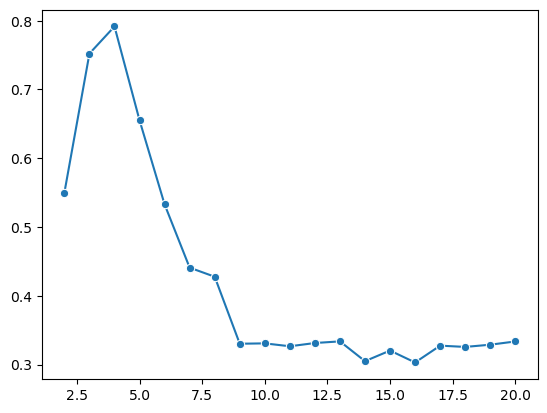

In [41]:
# plot - k & ss

sns.lineplot(x=range(2,21),y=ss,marker='o')